### Задание №1.
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np

In [2]:
for i in range(5):
    input(f'{i + 1} roulette spin:')
    print(f'The dropped number is {np.random.randint(37)}.')

1 roulette spin:
The dropped number is 8.
2 roulette spin:
The dropped number is 3.
3 roulette spin:
The dropped number is 0.
4 roulette spin:
The dropped number is 2.
5 roulette spin:
The dropped number is 27.


### Задание №2.1.
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Посчитаем вероятность события в рулетке, состоящее из двух бросков шарика: первый раз выпадает число меньшее 12, второй раз выпадает число большее 18.

Пусть $p$ - вероятность выпадения одного определённого числа от 0 до 36 (элементарное событие) и равна $1/37$.   
Тогда вероятность выпадения числа меньшего 12 (то есть от 0 до 11) согласно теореме сложения для несовместных событий равна:

$\normalsize P(A_1)=12\cdot p=12/37$ (12 раз складываем элементарные вероятности, на каждое число).

Также вычисляем вероятность выпадения числа большего 18 (от 19 до 36):

$\normalsize P(A_2)=18\cdot p=18/37$.

А вероятность события, когда первый раз выпадает число меньшее 12, а второй - число большее 18, найдем по теореме умножения для независимых событий:

$\normalsize P(A)=P(A_1)\cdot P(A_2) = 12\cdot 18/37^2 = 216/1369\approx0.158$.

Посчитаем на Python:

In [3]:
n = 1000000                                            # Количество опытов
a = np.random.randint(0, 37, (1000000, 2))             # Выборка из n опытов по 2 броска шарика
((a[:, 0] < 12) & (a[:, 1] > 18)).sum() / a.shape[0]   # Искомая вероятность

0.157684

### Задание №2.1.
Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы  х0 + … + х9.

In [4]:
from matplotlib import pyplot as plt
from scipy.stats import norm 
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [5]:
n = 10           # Количество выборок
size = 1000000   # Размер выборок

X = np.random.randint(0, 101, (size, n))   # n выборок размера size с равномерным распределением от 0 до 100
X_sum = X.sum(axis=1)   # Суммарная выборка

Согласно центральной предельной теореме распределение такой сумммарной выборки стремится к нормальному при увеличении размера суммируемых выборок (подвыборок). При чем математическое ожидание и дисперсия равны суммам математических ожиданий и дисперсий подвыборок соответственно. То есть при их равенстве получаем: $\normalsize\mu_{sum} = n\cdot\mu,\,\,\, \sigma_{sum}^2=n\cdot\sigma^2$, где $n$ - количество подвыборок.

В нашем случае при равномерном распределении подвыборок от 0 до 100 получим:

$\normalsize\displaystyle\mu_{sum}=10\cdot\frac{100+0}{2}=500$   
$\normalsize\displaystyle\sigma_{sum}^2=10\cdot\frac{(100-0)^2}{12}\approx8333.33\,\,\,\Rightarrow\,\,\,\sigma_{sum}\approx91.3$

Построим гистограмму нашей суммарной выборки и сравним ее с нормальным распределением с расчитанными параметрами.

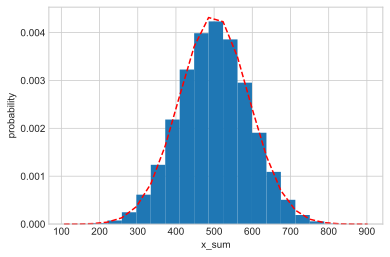

In [6]:
n, bins, patches = plt.hist(X_sum, 21, density=True)
y = norm.pdf(bins, 500, 91.3)
plt.plot(bins, y, 'r--')
plt.ylabel('probability')
plt.xlabel('x_sum')
plt.show()

### Задание №3.1.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [7]:
k = 2                                                     # Рассматриваемое количество успехов;
n = 4                                                     # Количество независимых испытаний в эксперименте;
n_exp = 1000000                                           # Количество экспериментов;
x_sum = np.random.randint(0, 2, (n_exp, n)).sum(axis=1)   # Выборка проведенных экспериментов;
p_sum = (x_sum == k).sum() / x_sum.size                   # Средняя вероятность k успехов в n_exp экспериментах,
p_sum                                                     # заключенных в последовательности n независимых испытаний. 

0.375365

Сравним найденную вероятность с вычисленной по формуле Бернулли:

$\normalsize\displaystyle P(k) = C_n^k p^k q^{n-k} = C_n^k\frac{1}{2^n} = \frac{n!}{k!(n-k)!}\cdot\frac{1}{2^n}$

Для нашего случая:

$\normalsize\displaystyle P(k=2) = \frac{4!}{2!2!}\cdot\frac{1}{2^4} = \frac{6}{16} = 0.375$

Вероятность, посчитанная численным методом, найдена верно.

### Задание №3.2.
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [8]:
from itertools import combinations, permutations

In [9]:
k, n = 3, 4

len(list(combinations(range(n), k))) / 2 ** n

0.25

In [10]:
k, n = 1, 6

len(list(combinations(range(n), k))) / 2 ** n

0.09375

### Задание №4.
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

In [11]:
k, n = 3, 4
for p in permutations(range(n), k):
    print(''.join(str(x) for x in p), end=' ')

012 013 021 023 031 032 102 103 120 123 130 132 201 203 210 213 230 231 301 302 310 312 320 321 

In [12]:
k, n = 2, 6
for p in permutations(range(n), k):
    print(''.join(str(x) for x in p), end=' ')

01 02 03 04 05 10 12 13 14 15 20 21 23 24 25 30 31 32 34 35 40 41 42 43 45 50 51 52 53 54 

### Задание №5.
Дополните код расчетом коэффициента корреляции x и y по формуле:
$$\normalsize R=\frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}}$$

коэффициенты: a = 0.6822546044960698, b = 0.1551583226392639
коэффициент корреляции R = 0.9027029504462198


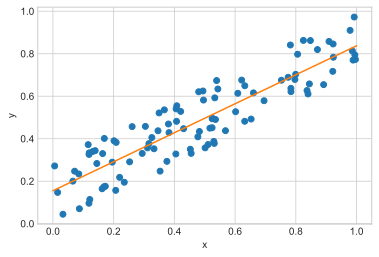

In [13]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
print(f'коэффициенты: a = {a}, b = {b}')
x_n = x - x.mean()
y_n = y - y.mean()
R = (x_n * y_n).sum() / np.sqrt((x_n ** 2).sum() * (y_n ** 2).sum())
print(f'коэффициент корреляции R = {R}')

plt.plot([0, 1], [b, a + b])
plt.show()